 # Hacktober NLP Project

## Goals:
  - Identify the best predictors for programming language
  - Build models to best predict the language used

## Plan of Action:
  - Acquire
  - Prepare
  - Explore
  - Model
  - Conclusions
  

## Data Dictionary

| Target Variable | Definition |
| ----- | ----- |
| language | The main programming language used|

| Feature | Definition | Data Type |
| ----- | ----- | ----- |
| repo | The repository obtained from Github| `object` |
| language| The main programming language used | `object` |
| readme_content | The contents included in the ReadMe file | `object` |
| lem | Readme contents that have been lemmatized | `object` |

In [1]:
import pandas as pd
import numpy as np
import time
import os
from typing import Dict, List, Optional, Union, cast
from bs4 import BeautifulSoup
import requests
from env import github_token, github_username
import wrangle as w
import explore as e

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score


## Acquire:
   - Web scrape data from Github
   - Download it as a json file

In [2]:
df = w.get_readme()
df

,repo,language,readme_contents
0,/AliceWonderland/hacktoberfest,HTML,# 🎃 HacktoberFest Starter Project 🎃\n\n** __Oc...
1,/fineanmol/Hacktoberfest2022,Python,Hacktoberfest-2022\n\n**Checkout this Project ...
2,/keshavsingh4522/hacktoberfest2021,Jupyter Notebook,"<div align=""centre"">\n <b>dont contribute i..."
3,/ossamamehmood/Hacktoberfest2022,Jupyter Notebook,# HacktoberFest 2022 `OPEN FIRST` Pull Request...
4,/tarunsinghofficial/HacktoberFest,Java,# HacktoberFest- Contribute to Open-Source.\n\...
...,...,...,...
125,/rituburman/hacktoberfest2020,C++,# Hacktoberfest For Everyone\nYou can start co...
126,/akanksha-raghav/Hacktoberfest2021,Jupyter Notebook,# Hacktoberfest2021\nHacktoberfest® is open to...
127,/TARANG0503/DSA-Practice,C++,## DSA Practice\nThis project is a collection ...
128,/rathoresrikant/HacktoberFestContribute,C++,Please note that the contributions made to thi...


## Prepare:
  - Use regex to clean our readme contents
  - Lemmatize the readme contents
  - Replace null values with the correct programming language
  - Split data into Train, Validate, Test

In [3]:
df['lem']= df.readme_contents.apply(w.clean_text)

In [4]:
df= w.jupy_replace(df)

In [5]:
df= w.clean_lang(df)

In [6]:
df['model']= df.lem.apply(w.join)
df.head()

,repo,language,readme_contents,lem,model
0,/AliceWonderland/hacktoberfest,html,# 🎃 HacktoberFest Starter Project 🎃\n\n** __Oc...,"[hacktoberfest, starter, project, oct, 24th, 2...",hacktoberfest starter project oct 24th 2017 up...
1,/fineanmol/Hacktoberfest2022,python,Hacktoberfest-2022\n\n**Checkout this Project ...,"[hacktoberfest2022, checkout, project, well, a...",hacktoberfest2022 checkout project well annoyi...
2,/keshavsingh4522/hacktoberfest2021,c++,"<div align=""centre"">\n <b>dont contribute i...","[div, aligncentre, bdont, contribute, repo, co...",div aligncentre bdont contribute repo contribu...
3,/ossamamehmood/Hacktoberfest2022,c++,# HacktoberFest 2022 `OPEN FIRST` Pull Request...,"[hacktoberfest, 2022, open, first, pull, reque...",hacktoberfest 2022 open first pull request fre...
4,/tarunsinghofficial/HacktoberFest,other,# HacktoberFest- Contribute to Open-Source.\n\...,"[hacktoberfest, contribute, opensource, create...",hacktoberfest contribute opensource create fir...


In [8]:
train, X_train, y_train, X_val, y_val, X_test, y_test = w.split_data(df, 'language')

## Exploration

In [7]:
word_freq= e.word_freq_new_df(df, w.clean_text)

In [8]:
word_freq

,readme,python,cplus+,html,other
td,187,9,162,0,12
contribution,181,55,42,23,45
repo,179,44,53,25,32
software,179,29,114,4,23
,173,29,58,0,1
...,...,...,...,...,...
interest,25,0,22,1,2
playing,25,1,24,0,0
every,25,5,10,5,2
accepted,25,8,7,6,3


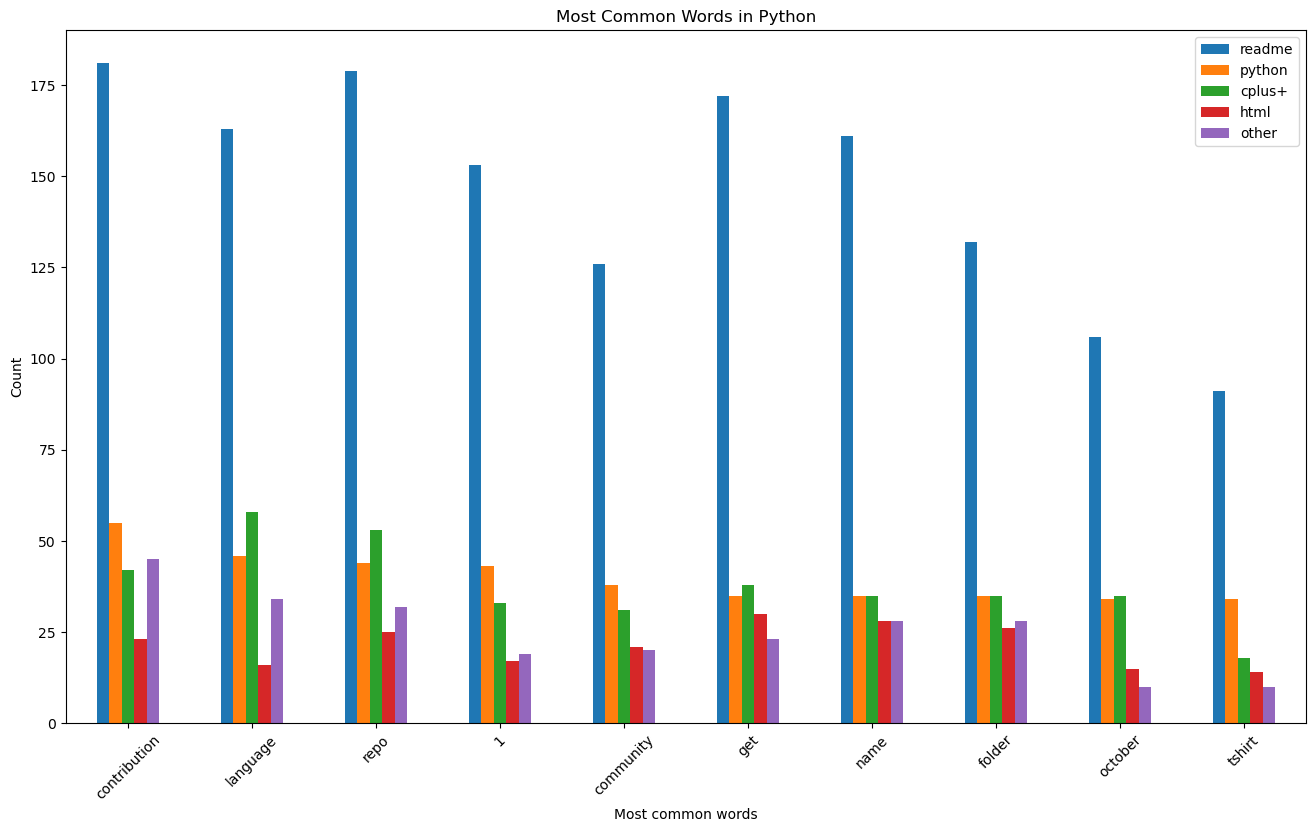

In [9]:
e.python_vis(word_freq)

Python Takeaways:
- The three most common words in Python are: pr, source, and create.
- Software could also be added to this list, because it occurs rarely in HTML and other languages.
- While these are the three most common words, the words are, for the most part, distributed evenly throughout most of the programming languages.

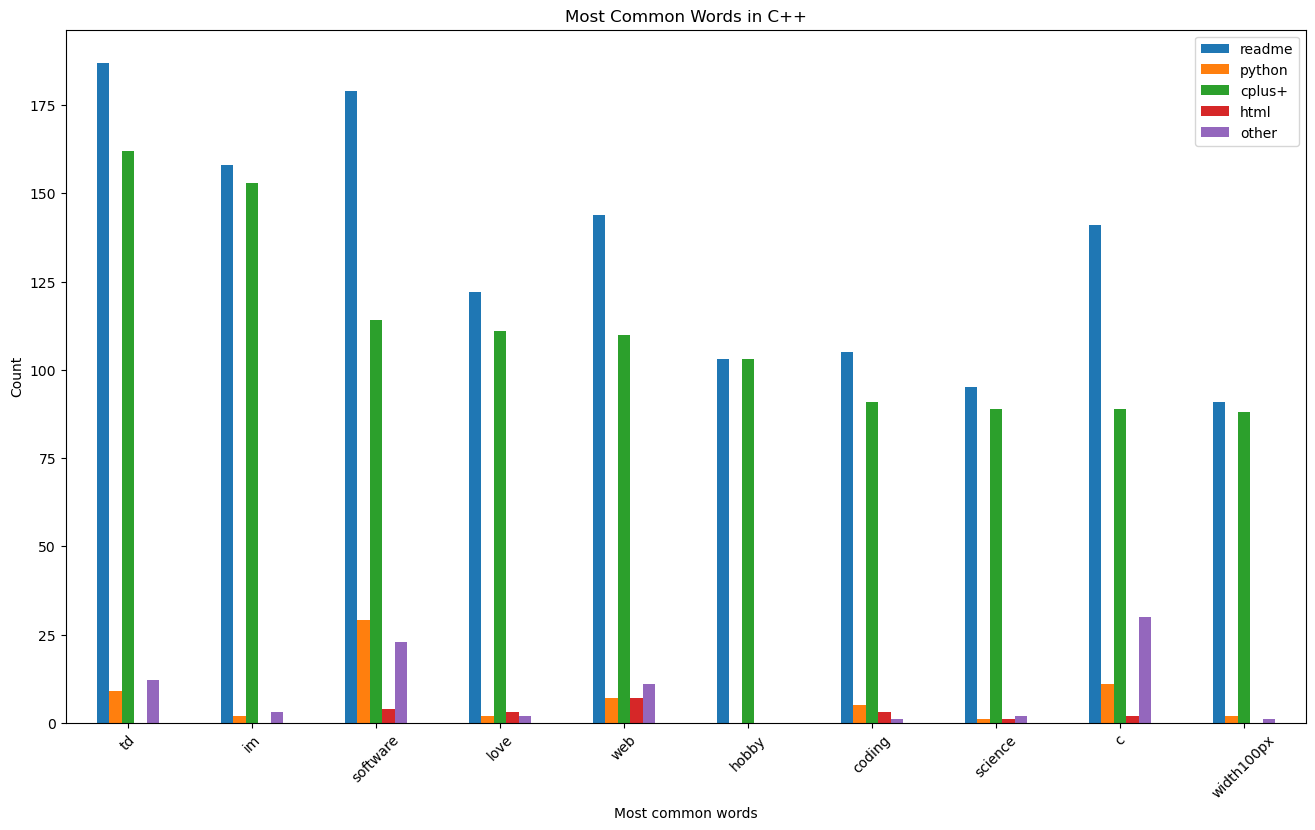

In [10]:
e.c_plus_plus_vis(word_freq)

C++ Takeaways:
- The three most common words in C++ are: td, im, and love.
- While these are the three most common words, hobby and titlecode should be added to this list because they do not appear in HTML, Python, or any of the other languages.

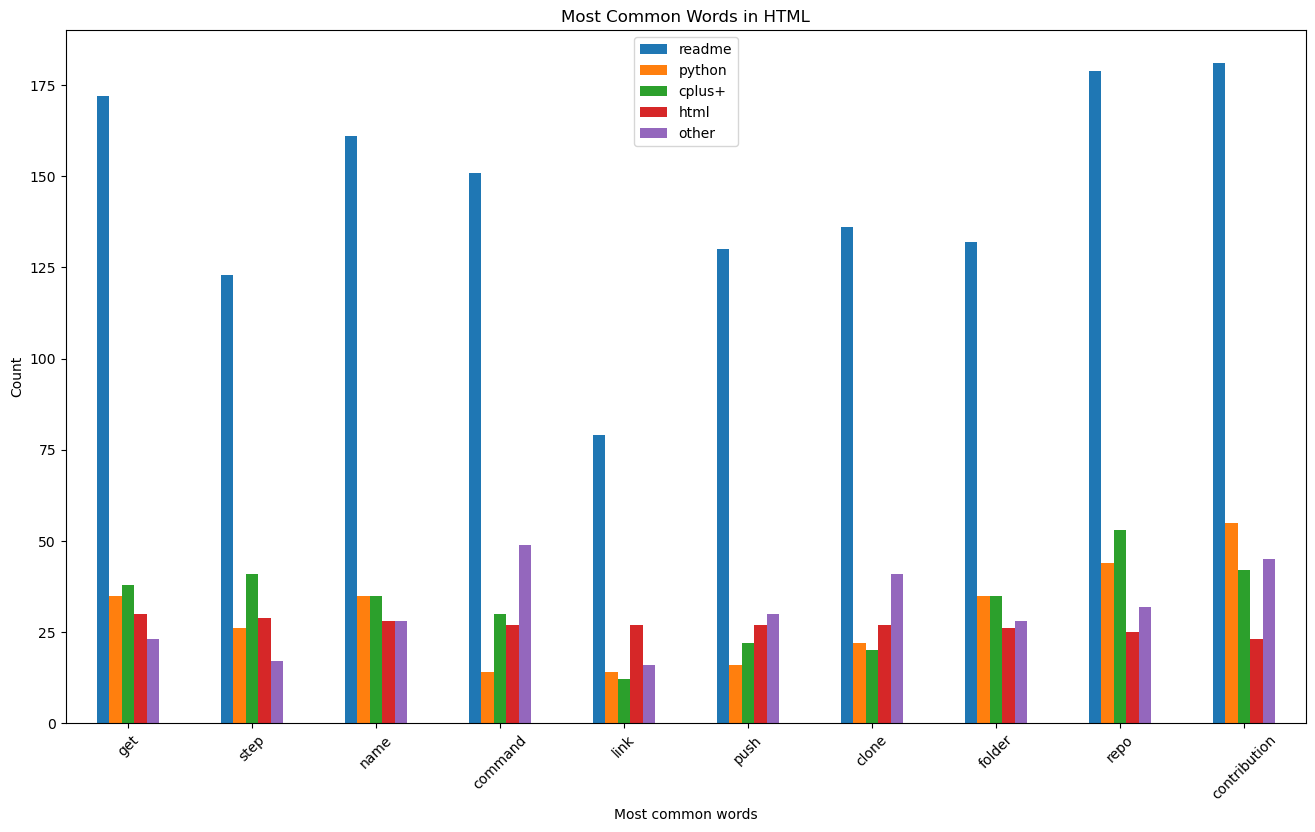

In [11]:
e.html_vis(word_freq)

HTML Takeaways:
- The three most common words in HTML are: branch, change, and file.
- HTML appears the most evenly distributed of all the programming languages and is harder to determine a specific word or words for this language.

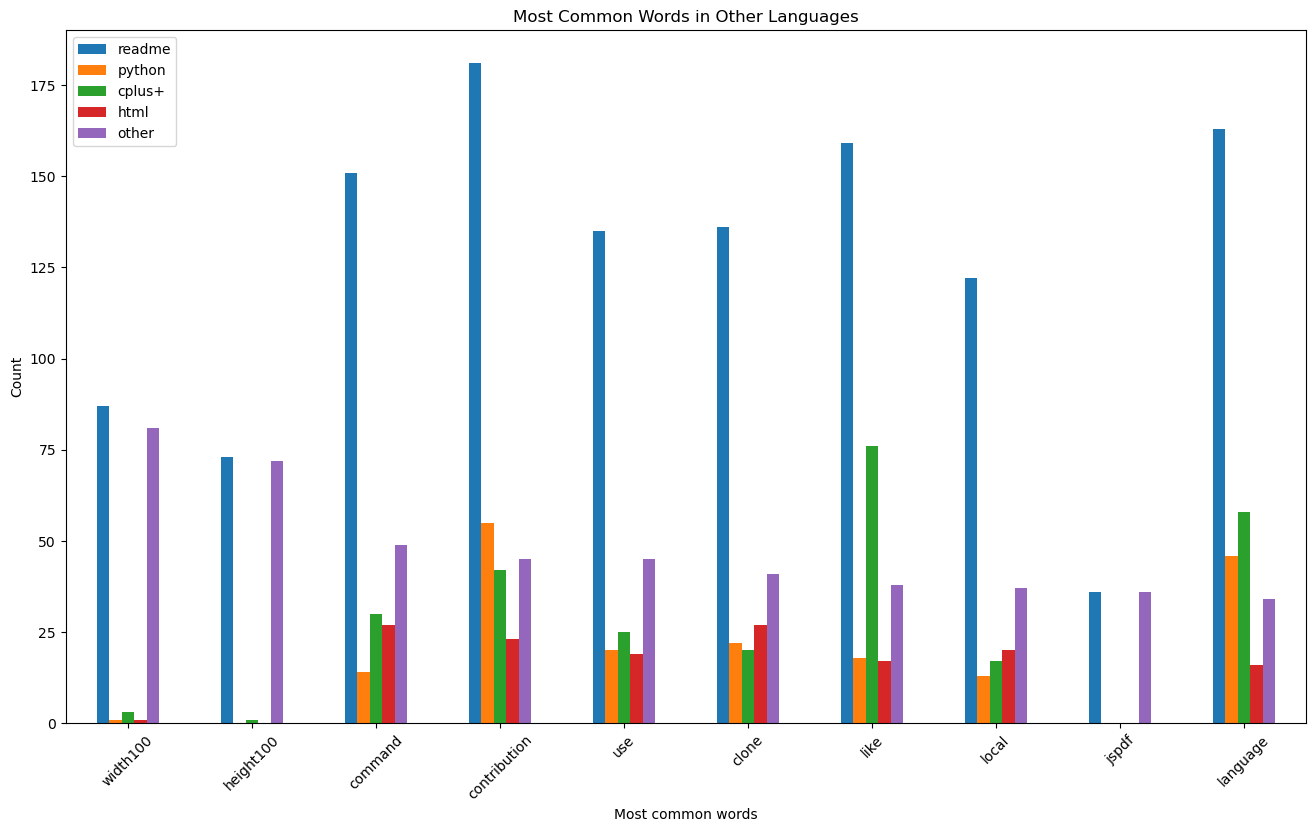

In [12]:
e.other_vis(word_freq)

Other Takeaways:
- The three most common words in other languages are: file, source, and change.
- All of the words in the top ten for other languages are about the same.

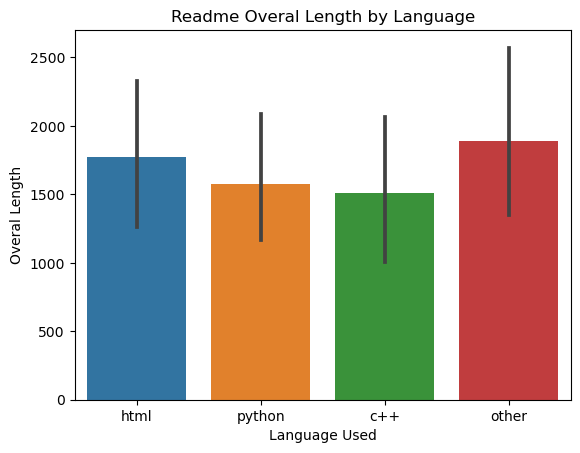

In [13]:
e.length_viz(df)

## Modeling
  - Used the found predictors from explore to make models
  - The best model was [Insert Model]

In [10]:
def tfidf():
    tfidf = TfidfVectorizer()
    tfidf_train = tfidf.fit_transform(X_train.model)
    tfidf_val = tfidf.transform(X_val.model)
    tfidf_test = tfidf.transform(X_test.model)

In [11]:
def run_models():  
    y_train = pd.DataFrame(y_train)
    y_val = pd.DataFrame(y_val)
    y_test = pd.DataFrame(y_test)
    
    lm = LogisticRegression().fit(tfidf_train, y_train.language)
    y_train['predict_lm'] = lm.predict(tfidf_train)
    y_val['predict_lm'] = lm.predict(tfidf_val)
    y_test['predict_lm'] = lm.predict(tfidf_test)

    rf = RandomForestClassifier().fit(tfidf_train, y_train.language)
    y_train['predict_rf'] = rf.predict(tfidf_train)
    y_val['predict_rf'] = rf.predict(tfidf_val)
    y_test['predict_rf'] = rf.predict(tfidf_test)

    knn = KNeighborsClassifier(n_neighbors=3).fit(tfidf_train, y_train.language)
    y_train['predict_knn'] = knn.predict(tfidf_train)
    y_val['predict_knn'] = knn.predict(tfidf_val)
    y_test['predict_knn'] = knn.predict(tfidf_test)

    dt = DecisionTreeClassifier(max_depth=3).fit(tfidf_train, y_train.language)
    y_train['predict_dt'] = dt.predict(tfidf_train)
    y_val['predict_dt'] = dt.predict(tfidf_val)
    y_test['predict_dt'] = dt.predict(tfidf_test)

In [12]:
def print_confusion_matrix(df,col):
    print('Accuracy: {:.2%}'.format(accuracy_score(df.language, df[col])))
    print('---')
    print('Confusion Matrix')
    print(pd.crosstab(df[col], df.language))
    print('---')
    print(classification_report(df.language, df[col]))

## Conclusion:
   - The